In [16]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

## Load Data

In [2]:
weekly_data = pd.read_csv('../src/data/weekly_data.csv')

In [3]:
weekly_data.head()

,ticker_symbol,post_date,open_value,high_value,low_value,close_value,volume,reaction_num,compound,writer,body,positive,negative,pct_change,ratio_pos,ratio_neg
0,AAPL,2014-12-29,112.82,113.13,107.35,109.33,101123903100,5185,0.161663,635,1969,1699,270,NaN,0.862875,0.137125
1,AAPL,2015-01-05,108.29,113.25,104.63,112.01,379213573670,6183,0.160282,1333,6684,5781,903,0.024513,0.864901,0.135099
2,AAPL,2015-01-12,112.60,112.80,105.20,105.99,386514603660,4830,0.112675,1369,6112,5088,1024,-0.053745,0.832461,0.167539
3,AAPL,2015-01-19,107.03,113.75,105.20,112.98,288118798950,4339,0.154350,1119,5584,4922,662,0.065950,0.881447,0.118553
4,AAPL,2015-01-26,113.74,120.00,109.03,117.16,1462857719310,26842,0.136326,4040,14469,12363,2106,0.036998,0.854447,0.145553


In [38]:
weekly_data.shape

(1572, 16)

In [41]:
weekly_data.dropna(subset=['pct_change'],inplace=True)
weekly_data.dropna(subset=['compound'],inplace=True)
weekly_data.shape

(1566, 16)

In [42]:
X = weekly_data.loc[:, weekly_data.columns != 'pct_change']
y = weekly_data.loc[:, 'pct_change']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Plot Key Variables

Text(0.5, 1.0, 'Compound Value vs Stock Price % Change')

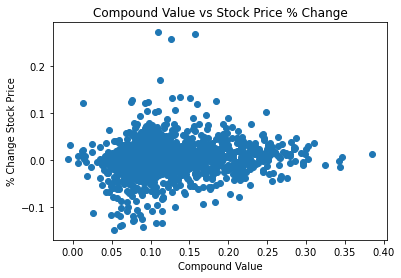

In [25]:
plt.scatter(X_train['compound'], y_train)
plt.xlabel('Compound Value')
plt.ylabel('% Change Stock Price')
plt.title('Compound Value vs Stock Price % Change')

Text(0.5, 1.0, 'Stock Volume vs Stock Price % Change')

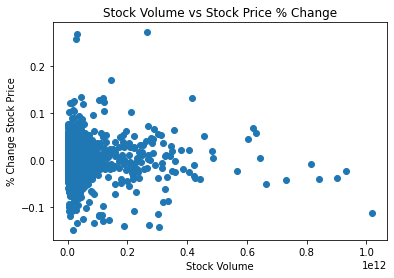

In [23]:
plt.scatter(X_train['volume'], y_train)
plt.xlabel('Stock Volume')
plt.ylabel('% Change Stock Price')
plt.title('Stock Volume vs Stock Price % Change')

Text(0.5, 1.0, 'Positive Ratio vs Stock Price % Change')

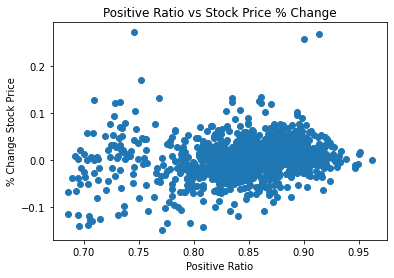

In [24]:
plt.scatter(X_train['ratio_pos'], y_train)
plt.xlabel('Positive Ratio')
plt.ylabel('% Change Stock Price')
plt.title('Positive Ratio vs Stock Price % Change')

## Fit Regression Model

In [45]:
regressor = LinearRegression()
regressor.fit(X_train['compound'].values.reshape(-1,1), y_train.values.reshape(-1,1))

y_pred = regressor.predict(X_test['compound'].values.reshape(-1,1))

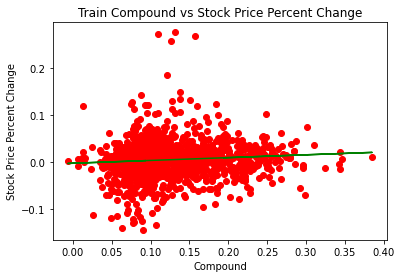

In [57]:
#Visualization of the training set results
plt.scatter(X_train['compound'], y_train, color = 'red')
plt.plot(X_train['compound'], regressor.predict(X_train['compound'].values.reshape(-1,1)), color = 'green')
plt.title('Train Compound vs Stock Price Percent Change')
plt.xlabel('Compound')
plt.ylabel('Stock Price Percent Change')
plt.show()

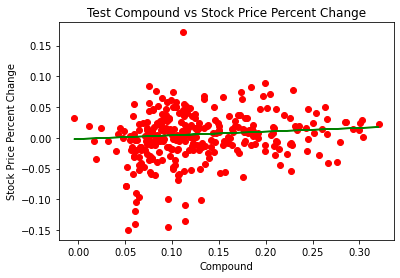

In [56]:
#Visualization of the test set results
plt.scatter(X_test['compound'], y_test, color = 'red')
plt.plot(X_test['compound'], y_pred, color = 'green')
plt.title('Test Compound vs Stock Price Percent Change')
plt.xlabel('Compound')
plt.ylabel('Stock Price Percent Change')
plt.show()

## Testing with Daily Data

In [59]:
daily_data = pd.read_csv('../src/data/daily_data.csv')

In [60]:
daily_data.dropna(subset=['pct_change'],inplace=True)
daily_data.dropna(subset=['compound'],inplace=True)
daily_data.shape

X = daily_data.loc[:, daily_data.columns != 'pct_change']
y = daily_data.loc[:, 'pct_change']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Text(0.5, 1.0, 'Compound Value vs Stock Price % Change')

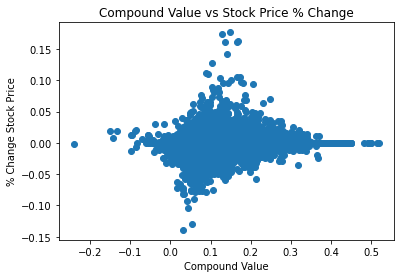

In [61]:
plt.scatter(X_train['compound'], y_train)
plt.xlabel('Compound Value')
plt.ylabel('% Change Stock Price')
plt.title('Compound Value vs Stock Price % Change')

In [62]:
regressor = LinearRegression()
regressor.fit(X_train['compound'].values.reshape(-1,1), y_train.values.reshape(-1,1))

y_pred = regressor.predict(X_test['compound'].values.reshape(-1,1))

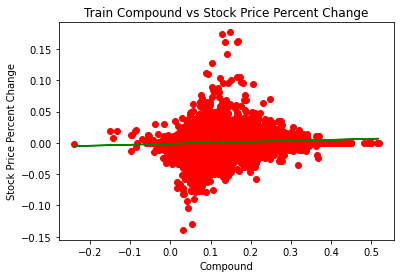

In [63]:
#Visualization of the training set results
plt.scatter(X_train['compound'], y_train, color = 'red')
plt.plot(X_train['compound'], regressor.predict(X_train['compound'].values.reshape(-1,1)), color = 'green')
plt.title('Train Compound vs Stock Price Percent Change')
plt.xlabel('Compound')
plt.ylabel('Stock Price Percent Change')
plt.show()

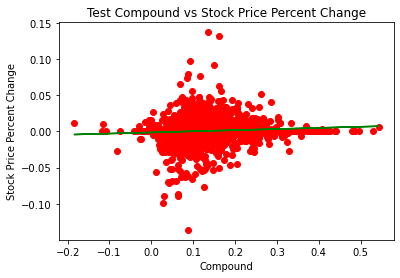

In [64]:
#Visualization of the test set results
plt.scatter(X_test['compound'], y_test, color = 'red')
plt.plot(X_test['compound'], y_pred, color = 'green')
plt.title('Test Compound vs Stock Price Percent Change')
plt.xlabel('Compound')
plt.ylabel('Stock Price Percent Change')
plt.show()